第五课主要介绍了卷积神经网络的基本结构
为什么要进行卷积而不像之前一样用wx+b的方式：
因为之前的方式直接将图片拉伸破坏了图像的空间结构；而进行卷积操作可以保留图像的空间结构

一、
开头讲了一下神经网络的发展史和一些神经网络可以运用到的场景，以下场景是我觉得比较新奇，之前没怎么见过的应用。

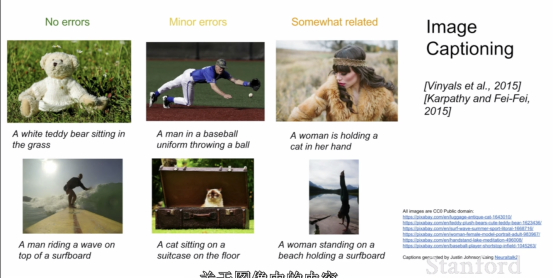
这个图介绍了卷积神经网络的一个用途：图像字幕。实际上就是给网络输入一张图片，网络输出一句话来描述这张图片上面的主要信息。

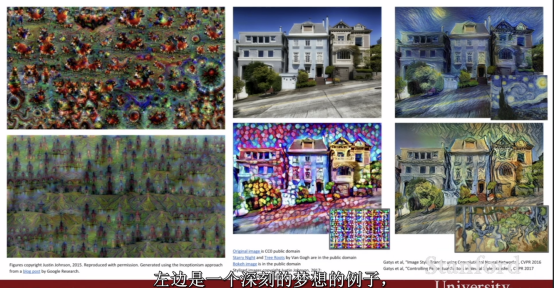
这个例子是通过神经网络去学习不同画家画画的风格，然后可以将输入的一张现实的图片转变为一位画家画出来的画的样子。

二、

接下来开始着重介绍卷积神经网络的基本结构。
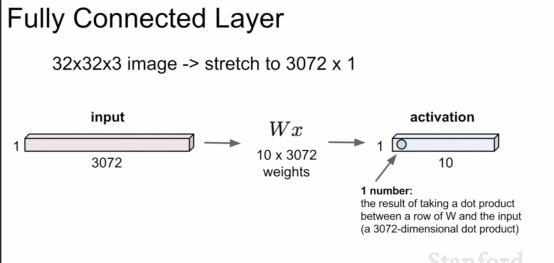
首先是全连接层，全连接层与之前的线性分类器有点类似，它是连接网络和最后预测值的，通过矩阵乘法，输出最后N个类别相对应的预测值。

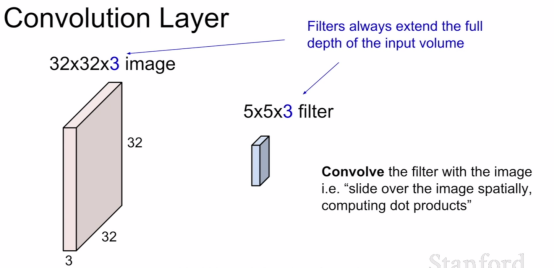
然后介绍了卷积层。首先进行卷积的滤波器的深度要与将要进行操作的图片的深度一致。
然后这边有几个超参数：kernel_size 卷积核的大小（3*3、5*5、7*7），步长：就是每隔几个像素值移动一次卷积核（一般有1,2,3），填充0元素的列数（下面会讲到的）


三、


卷积的主要作用就是去深度提取图像的特征信息，如下图所示
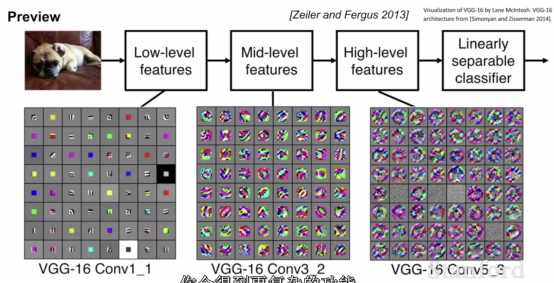
卷积越深到后面的特征就更加高级（我是这么理解的）。

接下来举了几个卷积的具体例子：

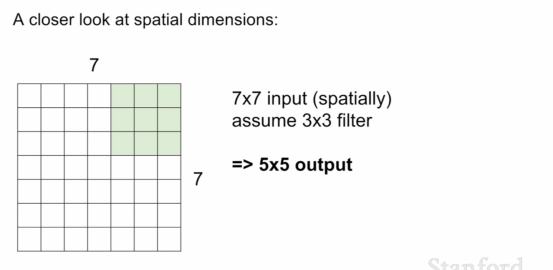
7*7的图片通过一个3*3的卷积核去卷积，步长为1，在不进行零元素填充的情况下，会将图像缩小为5*5的图像；若是步长为2，则会输出一个3*3的图像；步长3则不匹配7*7图片的大小。

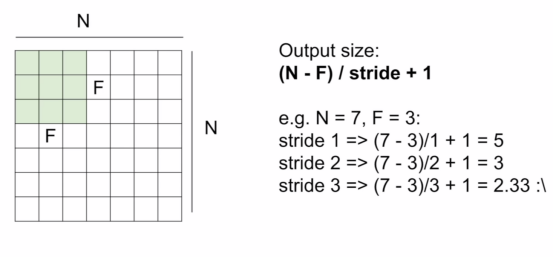
由此可以得到一个output size的公式 ：（图像大小-卷积核大小）/步长 +1 
由图可见当步长为3的时候，输出的size是2.33   不是整数，所以不适合。

四、


接下来讲了一个比较重要的操作zero pad。  
 零填充：目的在于防止进行卷积操作之后的输出图像急剧减小，所以进行零填充可以使输入和输出的大小保持一致。
 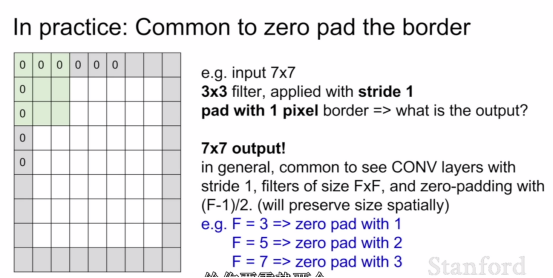
 这个图表示出了要保持前后输出一致需要多少的填充：填充大小=（kernel_size - 1）/ 2
当卷积核大小为3*3时，零填充大小为1。
注意事项：零填充的大小N，指的是在上下左右都填N行（列）零元素，说是说大小为N实际上这个图片填充之后size多了2N

接下来举了一些例子来计算一些简单网络中参数的数量：
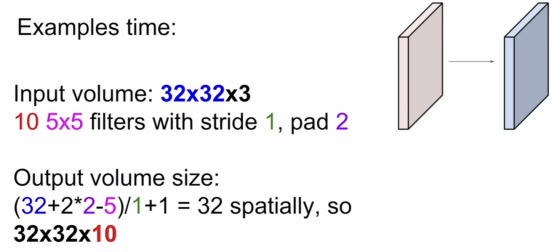
5*5的卷积核，填充是2，所以刚刚好前后输出一致都是32*32，所以最后输出的总的size就是32*32*10

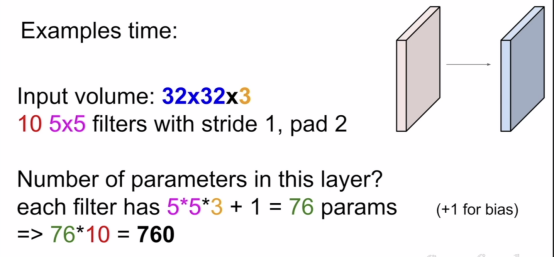
而由于图像深度是3，所以卷积核深度也是3,所以每层的参数数目为5*5*3+1=76，其中这个1是偏移量的参数，所以10层就有760个参数。

五、

在讲完零填充之后讲了池化层。从之前可知，如果我们一直采取零填充会导致每一层的数据量大小其实是不变的，这就浪费了许多计算时间和资源；所以这里采用pooling layer（池化层）来减少数据量。
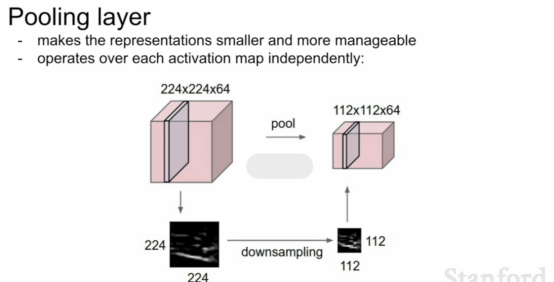
其中池化的操作有max pooling 和 average pooling（最大值和平均）；池化的计算方式其实跟卷积差不多，卷积是两个对应矩阵直接的点积，而池化就是在池化滤波器的size之内的元素值取最大值（max pooling）或者取平均值（average pooling）
所以池化这边也有 size 和 stride（步长） 两个超参数

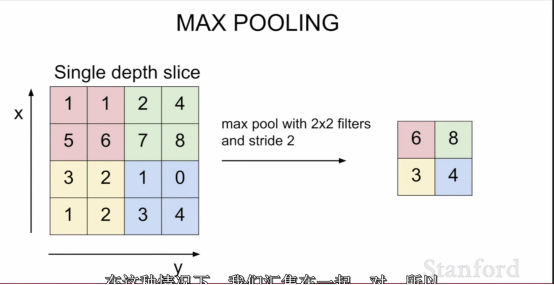
这是一个max pooling的比较直观的计算方式。
然后比较重要的一点是，池化层在进行操作的时候要让移动后的滤波器和移动前的滤波器直接要没有重叠的，所以步长最好跟滤波器的size保持一致。
